In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import platform
from platform import python_version
import jupyterlab

%matplotlib inline

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Darwin
release: 19.2.0

Python
version: 3.7.4

Python Packages
jupterlab==1.1.4
pandas==0.25.1
numpy==1.17.2


In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# printe dype and shape and info
print(diamonds.dtypes)
print(diamonds.info)
print(diamonds.shape)
print(diamonds.describe)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68 

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [6]:
print(diamonds.dtypes)
print(diamonds.info)
print(diamonds.shape)
print(diamonds.describe)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

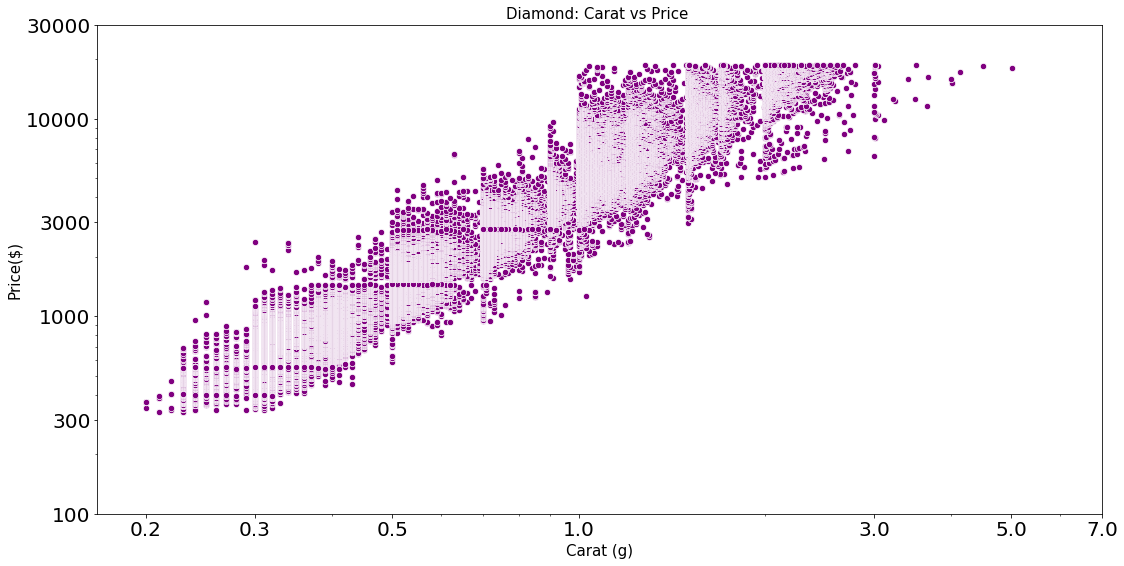

In [7]:
# bivariate plot of price vs. carat
fig,ax=plt.subplots(figsize =(18, 9))
sb.scatterplot(data = diamonds, x = 'carat', y = 'price', x_jitter = 0.2, y_jitter = 0.2, color ='purple', 
               edgecolors = 'w', palette = 'Set2', marker ='o', alpha = 'auto', s=40);

# log transforation in both axis
plt.xscale('log')
plt.yscale('log')

# specify axis tick labels after log transformation
yticks = [100, 300, 1000, 3000, 10000, 30000]
xticks = [0.2, 0.3, 0.5, 1, 3, 5, 7]
ax.set_yticks(yticks)
ax.set_xticks(xticks)

ax.set_xlabel(xlabel = 'Carat (g)', color='black', size =15)
ax.set_ylabel(ylabel = 'Price($)', color='black', size =15)

# turn off scientific notation: first,convert to ScalarFormater
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

# turn off scientific notation: second,convert use ticklabel_format to turn off scientific notations
ax.ticklabel_format(style ='plain', axis = 'both')

for tick in ax.get_xticklabels():
    tick.set_fontsize (20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)

# add figure title
plt.title('Diamond: Carat vs Price ', fontsize = 15);

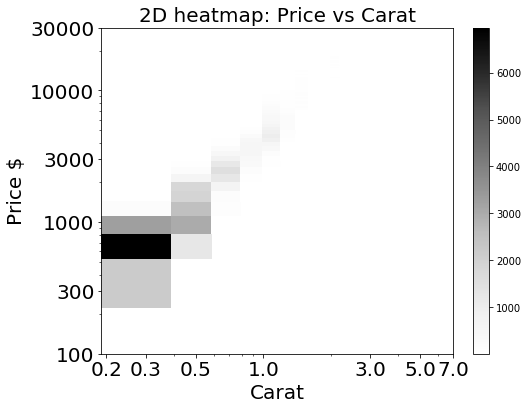

In [8]:
# create a heatmap with hist2d to show the relationship between 'price' and 'carat'
fig,ax = plt.subplots(figsize=(7,6))

# setup bin edges for x and y axis
bins_x = np.arange(diamonds['carat'].min()-0.01, diamonds['carat'].max()+0.01, 0.2)
bins_y = np.arange(diamonds['price'].min() -100, diamonds['price'].max()+100, 300)

plt.hist2d(data=diamonds, x="carat", y= "price", cmap=plt.cm.Greys, cmin =10, bins =[bins_x, bins_y])

# log transform both axis
plt.xscale('log')
plt.yscale('log')

# specify axis tick labels after log transformation
yticks = [100, 300, 1000, 3000, 10000, 30000]
xticks = [0.2, 0.3, 0.5, 1, 3, 5, 7]
ax.set_yticks(yticks)
ax.set_xticks(xticks)

# setup x and y labels
ax.set_xlabel(xlabel="Carat", size=20, color="black")
ax.set_ylabel(ylabel="Price $", size=20, color="black")

# add title
ax.set_title('2D heatmap: Price vs Carat', size=20)

# turn off scientific notation: first,convert to ScalarFormater
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

# adjust color key bar
plt.colorbar(orientation="vertical",ticklocation='auto',fraction= 0.05)

# turn off scientific notation: second,convert use ticklabel_format to turn off scientific notations
ax.ticklabel_format(style ='plain', axis = 'both')

# increase fontsize for axis tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize (20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)



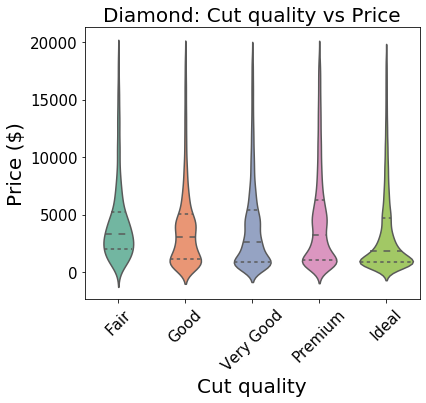

In [9]:
# make a violin plot for 'price' and 'cut'
fig, ax = plt.subplots(figsize= (6, 5))

# use seaborn violinplot
sb.violinplot(data = diamonds, x='cut', y='price', palette='Set2', inner='quartile',
             dodge=True, saturation = 0.75);

# setup x and y labels
ax.set_xlabel(xlabel="Cut quality", size=20, color="black")
ax.set_ylabel(ylabel="Price ($)", size=20, color="black")

# increase fontsize for x and y axis tick labels
for ticks in ax.get_xticklabels():
    ticks.set_fontsize(15)
    ticks.set_rotation(45)
for ticks in ax.get_yticklabels():
    ticks.set_fontsize(15)

ax.set_title("Diamond: Cut quality vs Price", size =20);

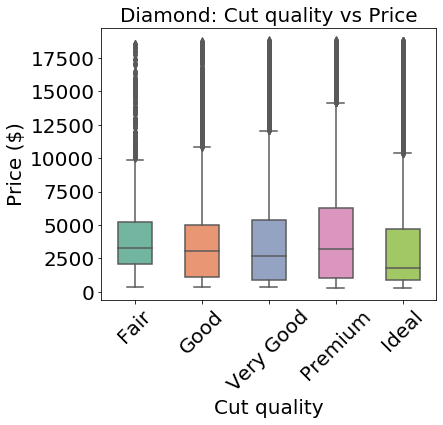

In [10]:
# make a boxplot
fig,ax = plt.subplots(figsize=(6, 5))

# seaborn boxplot
sb.boxplot(data=diamonds, x="cut", y="price", palette="Set2", width=0.5, saturation=0.75)

# setup x and y labels
ax.set_xlabel(xlabel="Cut quality", size=20, color="black")
ax.set_ylabel(ylabel="Price ($)", size=20, color="black")

# increase fontsize for x and y axis tick labels
for ticks in ax.get_xticklabels():
    ticks.set_fontsize(20)
    ticks.set_rotation(45)
for ticks in ax.get_yticklabels():
    ticks.set_fontsize(20)

ax.set_title("Diamond: Cut quality vs Price", size =20);

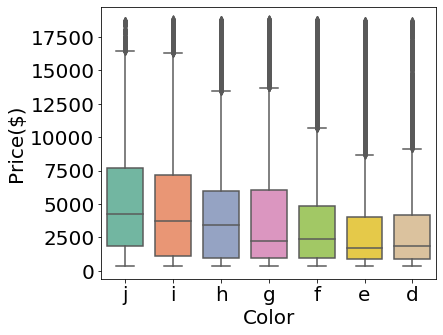

In [11]:
# boxplot diamond : color vs price
fig, ax = plt.subplots(figsize=(6,5))

# boxplot
sb.boxplot(data=diamonds, x="color", y="price", dodge=True, saturation=0.75, palette="Set2", width=0.75)

# add x and y axis labels
ax.set_xlabel(xlabel="Color", size=20, color="black")
ax.set_ylabel(ylabel="Price($)", size=20, color="black")

# rename y axis tick labels
plt.xticks([0,1,2,3,4,5,6],['j','i','h','g','f','e','d'])

# increase axis tick label size
for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)



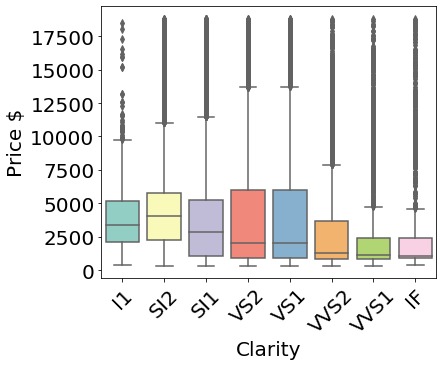

In [12]:
# boxplot 'price' vs 'clarity'
fig, ax=plt.subplots(figsize=(6,5))

# make boxplot
sb.boxplot(data=diamonds, x="clarity", y="price", palette="Set3", saturation=0.85);

# add axis labels
ax.set_xlabel(xlabel='Clarity', size=20, color="black")
ax.set_ylabel(ylabel='Price $', size=20, color="black")

for ticks in ax.get_xticklabels():
    ticks.set_fontsize(20)
    ticks.set_rotation(45)
for ticks in ax.get_yticklabels():
    ticks.set_fontsize(20)


Price vs. Carat comment 1: <span style="color:blue">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

Price vs. Carat comment 2: <span style="color:blue">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>

Price vs. Carat comment 3: <span style="color:blue">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

Price vs. Categorical comment 1: <span style="color:blue">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

Price vs. Categorical comment 2: <span style="color:blue">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

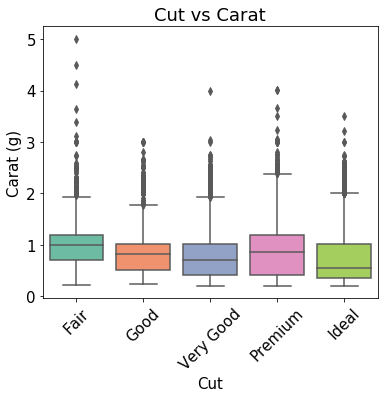

In [22]:
# bivariate plots of carat vs. cut, color, clarity

# make a box plot for 'carat' vs 'cut'
fig,ax = plt.subplots(figsize=(6, 5))

sb.boxplot(data=diamonds, x="cut", y="carat", palette="Set2", saturation=0.85);

# add labels for both axis
ax.set_xlabel(xlabel='Cut', size=15, color="black")
ax.set_ylabel(ylabel='Carat (g)', size=15, color="black")

# increase the font size for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
# add fig title
ax.set_title('Cut vs Carat', size=18);


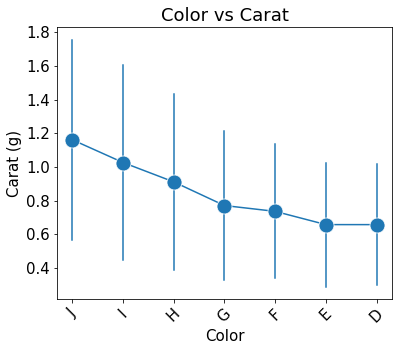

In [41]:
# bivariate plots of carat vs. color

# make a box plot for 'carat' vs 'color'
fig,ax = plt.subplots(figsize=(6, 5))

sb.lineplot(data=diamonds, x="color", y="carat",ci="sd",
            err_style="bars", marker="o", markersize=15, palette="Set2");

# add labels for both axis
ax.set_xlabel(xlabel='Color', size=15, color="black")
ax.set_ylabel(ylabel='Carat (g)', size=15, color="black")

# increase the font size for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
# add fig title
ax.set_title('Color vs Carat', size=18);



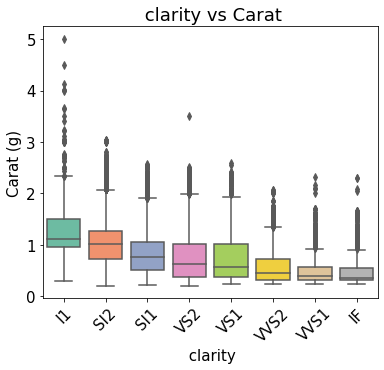

In [28]:
# bivariate plots of carat vs. clarity

# make a box plot for 'carat' vs 'color'
fig,ax = plt.subplots(figsize=(6, 5))

sb.boxplot(data=diamonds, x="clarity", y="carat", palette="Set2", saturation=0.85);

# add labels for both axis
ax.set_xlabel(xlabel=' clarity', size=15, color="black")
ax.set_ylabel(ylabel='Carat (g)', size=15, color="black")

# increase the font size for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
# add fig title
ax.set_title(' clarity vs Carat', size=18);

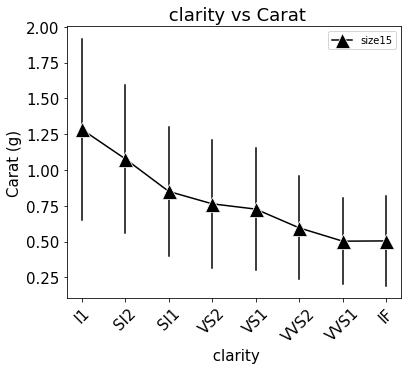

In [40]:
# bivariate plots of carat vs. clarity

# make a box plot for 'carat' vs 'color'
fig,ax = plt.subplots(figsize=(6, 5))

sb.lineplot(data=diamonds, x="clarity", y="carat", marker="^", markersize=15, 
            err_style="bars", color="k", ci="sd", label='size15');

# add labels for both axis
ax.set_xlabel(xlabel=' clarity', size=15, color="black")
ax.set_ylabel(ylabel='Carat (g)', size=15, color="black")

# increase the font size for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
# add fig title
ax.set_title(' clarity vs Carat', size=18);

Carat vs. Categorical comment: <span style="color:blue">These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>